<a href="https://colab.research.google.com/github/abelemlem/ABC/blob/main/Analyzing_Historical_Stock_Revenue%20Data_Building_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import yfinance as yf
import pandas as pd

# Create Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical market data
tesla_data = tesla.history(period="1mo")
print(tesla_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2025-05-02 00:00:00-04:00  284.899994  294.779999  279.809998  287.209991   
2025-05-05 00:00:00-04:00  284.570007  284.850006  274.399994  280.260010   
2025-05-06 00:00:00-04:00  273.109985  277.730011  271.350006  275.350006   
2025-05-07 00:00:00-04:00  276.880005  277.920013  271.000000  276.220001   
2025-05-08 00:00:00-04:00  279.630005  289.799988  279.410004  284.820007   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-05-02 00:00:00-04:00  114454700        0.0           0.0  
2025-05-05 00:00:00-04:00   94618900        0.0           0.0  
2025-05-06 00:00:00-04:00   76715800        0.0           0.0  
2025-05-07 00:00:00-04:00   71592600        0.0           0.0  
2025-05-08 00:00:00-04:00   97539400        0.0           0.0  


In [5]:
tesla_revenue.tail()

NameError: name 'tesla_revenue' is not defined

In [6]:
# Import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send HTTP request and get HTML
html_data = requests.get(url).text

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Extract the Tesla Quarterly Revenue table
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Rename and clean columns
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Display the last 5 rows
tesla_revenue.tail()

NameError: name 'tesla_revenue' is not defined

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Get the Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Extract the correct revenue table
tesla_revenue = None
tables = soup.find_all("table")

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Step 4: Check if table was found
if tesla_revenue is None:
    print("Tesla revenue table not found.")
else:
    # Step 5: Clean and display last 5 rows
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

    # Show the last 5 rows
    print(tesla_revenue.tail())

Tesla revenue table not found.


In [10]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")

for i, table in enumerate(tables):
    # Print first 200 characters of table text to identify content
    print(f"Table {i} preview:")
    print(table.text[:200])
    print("----")

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Fetch HTML content from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Use BeautifulSoup to parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the correct table containing revenue data
tables = soup.find_all("table")
tesla_revenue = None

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Step 4: Clean and convert the revenue data
if tesla_revenue is not None:
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue.dropna(inplace=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

    # Step 5: Display the last five rows
    print(tesla_revenue.tail())
else:
    print("Tesla revenue table not found.")

Tesla revenue table not found.


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Get the HTML content from the Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables
tables = soup.find_all("table")

# Step 4: Try to find the first table with class "historical_data_table"
tesla_revenue = None

for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Step 5: Clean and format the data
if tesla_revenue is not None:
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

    # Display last 5 rows
    print(tesla_revenue.tail())
else:
    print("Tesla revenue table still not found.")

Tesla revenue table still not found.


In [3]:
tesla_revenue = pd.read_html(url)[1]  # 0 is header table, 1 is revenue table
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Show last 5 rows
print(tesla_revenue.tail())

HTTPError: HTTP Error 403: Forbidden

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Request HTML from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables and get the correct one
tables = soup.find_all("table")

# Default to None
tesla_revenue = None

# Step 4: Search for the table with revenue data
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Step 5: If table is found, clean and display
if tesla_revenue is not None:
    # Clean up the dataframe
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

    # Display the last 5 rows
    print("Last 5 rows of Tesla revenue data:")
    print(tesla_revenue.tail())

else:
    print("Tesla revenue table not found.")

Tesla revenue table not found.


In [6]:
import pandas as pd

# Step 1: Load all tables from the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tables = pd.read_html(url)  # This loads all tables in a list

# Step 2: Get the second table (Tesla Quarterly Revenue)
tesla_revenue = tables[1]

# Step 3: Clean the dataframe
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 4: Display the last 5 rows
print(tesla_revenue.tail())

python
Copy
Edit
import pandas as pd

# Step 1: Load all tables from the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tables = pd.read_html(url)  # This loads all tables in a list

# Step 2: Get the second table (Tesla Quarterly Revenue)
tesla_revenue = tables[1]

# Step 3: Clean the dataframe
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 4: Display the last 5 rows
print(tesla_revenue.tail())

HTTPError: HTTP Error 403: Forbidden

In [7]:
ue data as the second table on the page. Let’s skip BeautifulSoup and just use pandas.read_html(), which will extract all tables.

Here is the working all-in-one script:

python
Copy
Edit
import pandas as pd

# Step 1: Load all tables from the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tables = pd.read_html(url)  # This loads all tables in a list

# Step 2: Get the second table (Tesla Quarterly Revenue)
tesla_revenue = tables[1]

# Step 3: Clean the dataframe
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 4: Display the last 5 rows
print(tesla_revenue.tail())

SyntaxError: invalid character '’' (U+2019) (<ipython-input-7-ce806a582cc3>, line 1)

In [8]:

import pandas as pd

# Step 1: Load all tables from the webpage
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tables = pd.read_html(url)  # This loads all tables in a list

# Step 2: Get the second table (Tesla Quarterly Revenue)
tesla_revenue = tables[1]

# Step 3: Clean the dataframe
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 4: Display the last 5 rows
print(tesla_revenue.tail())

HTTPError: HTTP Error 403: Forbidden

In [9]:
import pandas as pd
import requests

# Step 1: Define the URL and headers to mimic a browser
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Step 2: Get the page with headers
response = requests.get(url, headers=headers)
html = response.text

# Step 3: Extract tables from the HTML
tables = pd.read_html(html)

# Step 4: Tesla revenue is usually the second table
tesla_revenue = tables[1]

# Step 5: Clean the dataframe
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 6: Show last 5 rows
print(tesla_revenue.tail())

         Date  Revenue
59 2010-06-30     28.0
60 2010-03-31     21.0
61 2009-12-31      NaN
62 2009-09-30     46.0
63 2009-06-30     27.0


<ipython-input-9-1e7957dc74f2>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


In [10]:
import pandas as pd
import requests

# Step 1: Define the URL and headers to mimic a browser
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Step 2: Get the page with headers
response = requests.get(url, headers=headers)
html = response.text

# Step 3: Extract tables from the HTML
tables = pd.read_html(html)

# Step 4: Tesla revenue is usually the second table
tesla_revenue = tables[1]

# Step 5: Clean the dataframe
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Step 6: Show last 5 rows
print(tesla_revenue.tail())

         Date  Revenue
59 2010-06-30     28.0
60 2010-03-31     21.0
61 2009-12-31      NaN
62 2009-09-30     46.0
63 2009-06-30     27.0


<ipython-input-10-1e7957dc74f2>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


In [11]:
import yfinance as yf
import pandas as pd

# Step 1: Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Step 2: Reset the index to move the date from index to a column
gme_data.reset_index(inplace=True)

# Step 3: Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Define the URL and user-agent headers to mimic a browser
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Step 2: Request the page
response = requests.get(url, headers=headers)
html = response.text

# Step 3: Parse HTML and extract tables
soup = BeautifulSoup(html, "html.parser")
tables = pd.read_html(html)

# Step 4: GameStop revenue table is usually the second one
gme_revenue = tables[1]

# Step 5: Clean the dataframe
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue = gme_revenue[gme_revenue['Revenue'] != '']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Step 6: Display last five rows
print(gme_revenue.tail())

         Date  Revenue
60 2010-01-31   3524.0
61 2009-10-31   1835.0
62 2009-07-31   1739.0
63 2009-04-30   1981.0
64 2009-01-31   3492.0


<ipython-input-12-1332920af3a0>:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


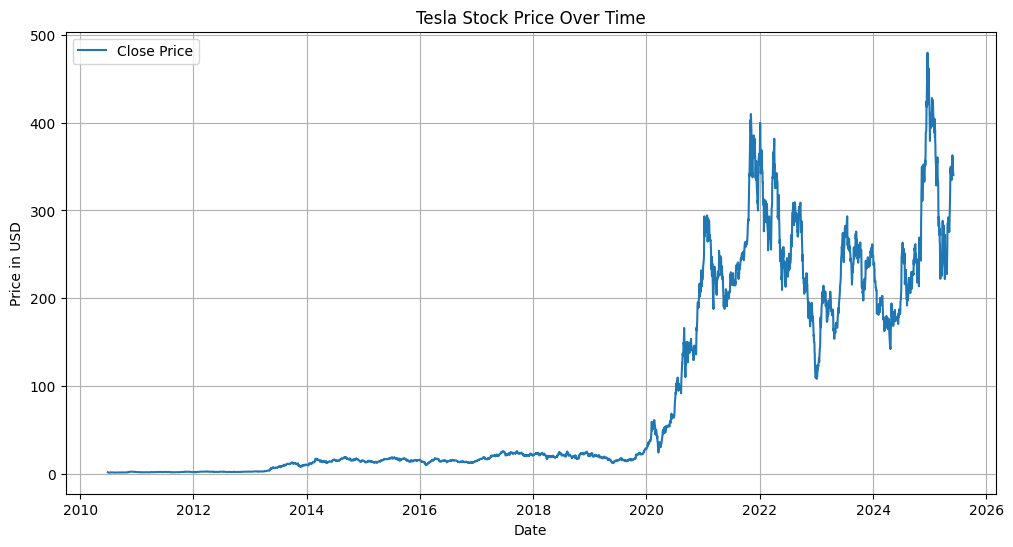

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Define a function to create the stock graph
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price in USD')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 2: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Step 3: Plot the Tesla stock data using the function
make_graph(tesla_data, 'TSLA', 'Tesla Stock Price Over Time')


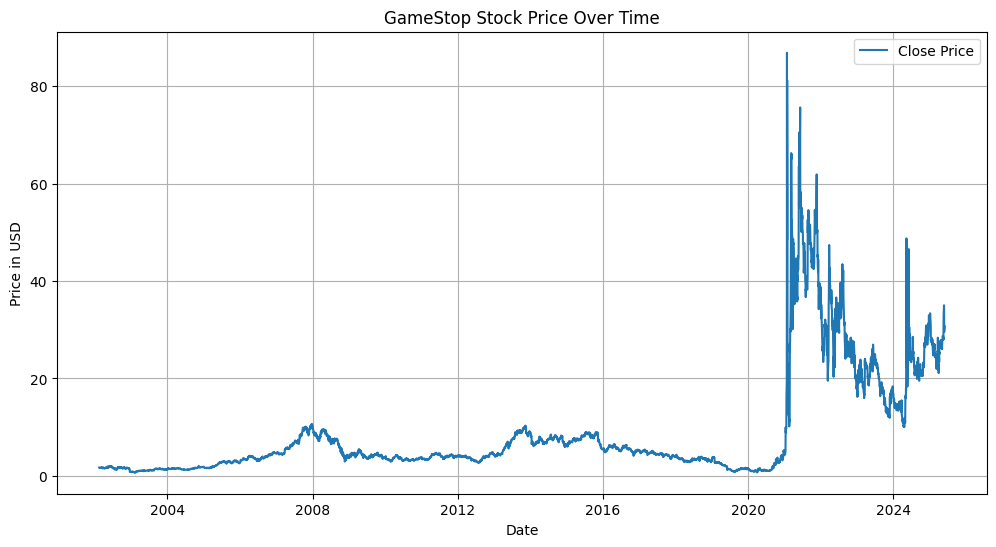

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the make_graph function if not already defined
def make_graph(stock_data, stock, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price in USD')
    plt.legend()
    plt.grid(True)
    plt.show()

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Plot the GameStop stock data
make_graph(gme_data, 'GME', 'GameStop Stock Price Over Time')
